# mqtt 통신 확인

In [29]:
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)

MQTT_TOPIC = [("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all",0),("mobile-ingkle-test-healthcare/sm_q7_01/data/_all",0)]
sen1 = []
sen2 = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe(MQTT_TOPIC)
    
def on_message(client, userdata, msg):
    global sen1
    global sen2
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    
    if msg.topic[30:39] ==  'sm_sn20_0':
        sen1.append([data[0][1],data[1][1],data[2][1],data[3][1]])
    else :
        sen2.append([data[1][1],data[2][1],data[3][1]])
        
    sen1 = sen1[-1:]
    sen2 = sen2[-1:]
    
    if len(sen1) == 1  and len(sen2) == 1:
        sen3 = sen1[0]+sen2[0]
        ''' row = []
        row.append(sen3[1:])
        row = row[0]'''
        
        row = np.array(sen3[1:])
        unixtime = np.array(sen3[0])
        
        p = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy') 
        tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/time.npy') 
        #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy')
        
        np.save(p, row)
        np.save(tp, unixtime)
    
        print('row',row) 
        #print('unixtime',unixtime)

    
    
client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)
client.loop_forever()


0

# mqtt cv2 연결확인

In [72]:
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)

MQTT_TOPIC = [("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all",0),("mobile-ingkle-test-healthcare/sm_q7_01/data/_all",0)]
sen1 = []
sen2 = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe(MQTT_TOPIC)
    
def on_message(client, userdata, msg):
    global sen1
    global sen2
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    
    if msg.topic[30:39] ==  'sm_sn20_0':
        sen1.append([data[0][1],data[1][1],data[2][1],data[3][1]])
    else :
        sen2.append([data[1][1],data[2][1],data[3][1]])
        
    sen1 = sen1[-1:]
    sen2 = sen2[-1:]
    
    if len(sen1) == 1  and len(sen2) == 1:
        sen3 = sen1[0]+sen2[0]
        ''' row = []
        row.append(sen3[1:])
        row = row[0]'''
        
        row = np.array(sen3[1:])
        unixtime = np.array(sen3[0])
        
        p = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy') 
        tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/time.npy') 
        #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy')
        
        np.save(p, row)
        np.save(tp, unixtime)
    
        print('row',row) 
        #print('unixtime',unixtime)

    
    
client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)
#client.loop_forever()


0

In [73]:
# 영상, mqtt데이터 동시수신 
import time
import cv2

cap = cv2.VideoCapture(1)


while cap.isOpened():

    ret,frame = cap.read()

    client.loop()
    
    row = np.load(os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy'))
    
    cv2.putText(frame, f'{row}', (50,50), cv2.FONT_ITALIC, 0.5, (255,0,0), 2)
    cv2.imshow('me',frame) 

    if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
            break

cap.release()
cv2.destroyAllWindows()  


Mqtt Connected!
row [-0.46689951 -9.63858891  2.26480675  4.80583191 -3.2351532   7.96047974]
row [-0.46929234 -9.69601631  2.22652149  4.80583191 -3.2351532   7.96047974]
row [-0.46929234 -9.69601631  2.22652149  4.80583191 -3.2351532   7.96047974]
row [-0.3400799  -9.67926693  2.30548453  4.80583191 -3.2351532   7.96047974]
row [-0.41186461 -9.70319462  2.45144677  4.80583191 -3.2351532   7.96047974]
row [-0.41186461 -9.70319462  2.45144677  4.80583191 -3.2351532   7.96047974]
row [-0.41186461 -9.70319462  2.45144677  4.80845642 -3.24102783  7.9602356 ]
row [-0.45732823 -9.67926693  2.14755821  4.80845642 -3.24102783  7.9602356 ]
row [-0.45732823 -9.67926693  2.14755821  4.78834534 -3.23048401  7.97006226]
row [-0.39032918 -9.65773106  2.35094833  4.78834534 -3.23048401  7.97006226]
row [-0.50518471 -9.69840908  2.33898425  4.78834534 -3.23048401  7.97006226]
row [-0.50518471 -9.69840908  2.33898425  4.78834534 -3.23048401  7.97006226]
row [-0.50518471 -9.69840908  2.33898425  4.7873

# 오토라벨링

In [74]:
import os
import numpy as np
DATA_PATH = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA')  #os.path.join( file name) 파일 이름만 정해주고 경로는 현재 경로이다.

actions = np.array(['leaning','sitting_chair','sitting_floor','slow_walking','standing','walking'])


no_sequences = 30 #영상 30개 만들어지는데

sequence_length = 10 #영상 1개의 프레임수는 100개



In [75]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [80]:
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)

MQTT_TOPIC = [("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all",0),("mobile-ingkle-test-healthcare/sm_q7_01/data/_all",0)]
sen1 = []
sen2 = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe(MQTT_TOPIC)
    
def on_message(client, userdata, msg):
    global sen1
    global sen2
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    
    if msg.topic[30:39] ==  'sm_sn20_0':
        sen1.append([data[0][1],data[1][1],data[2][1],data[3][1]])
    else :
        sen2.append([data[1][1],data[2][1],data[3][1]])
        
    sen1 = sen1[-1:]
    sen2 = sen2[-1:]
    
    if len(sen1) == 1  and len(sen2) == 1:
        sen3 = sen1[0]+sen2[0]
        ''' row = []
        row.append(sen3[1:])
        row = row[0]'''
        
        row = np.array(sen3[1:])
        #unixtime = np.array(sen3[0])
        
        #p = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy') 
        #tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/time.npy') 
        #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy')
        
        np.save(path,row)
        #np.save(p, row)
        #np.save(tp, unixtime)
        
        print('row',row) 
        #print('unixtime',unixtime)

    
    
client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)
#client.loop_forever()


0

In [81]:
# 영상과 mqtt 데이터 원하는 파일에 분류하여 저장

cap = cv2.VideoCapture(0)
print('H:',cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print('w:',cap.get(cv2.CAP_PROP_FRAME_WIDTH))
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) 
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/dlwnr/health care/model/mqtt2/autolabel2.avi', fourcc, fps, (w, h))


    
# 액션 선택
for action in actions:
    # 영상 선택
    for sequence in range(no_sequences):
        # 이미지 선택
        for frame_num in range(sequence_length):

            # 프레임 읽기
            ret, frame = cap.read()
            
            
            image = frame.copy()

          
            
            cv2.putText(image, ' frame :{}'.format(frame_num), (270,70), 
                            cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
        
            cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 155, 50), 2, cv2.LINE_AA)
            
        
            cv2.putText(image, 'SAVE_{}_DATA'.format(action), (70,400), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0, 255), 4, cv2.LINE_AA)
            cv2.putText(image, 'Video{}'.format(sequence), (30,70), 
                        cv2.FONT_HERSHEY_SIMPLEX, 2,  (255, 155, 50), 2, cv2.LINE_AA)
            
            cv2.imshow('OpenCV Feed', image)
        
            
            path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
            client.loop()


            #영상 저장
            out.write(image)

            #끄기
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

            
out.release()                
cap.release()
cv2.destroyAllWindows()

H: 480.0
w: 640.0
Mqtt Connected!
row [-0.49082774 -9.69601631  2.10448742  4.97497559 -3.08683777  7.88781738]
row [-0.44057846 -9.70558739  2.11645174  4.97497559 -3.08683777  7.88781738]
row [-0.44057846 -9.70558739  2.11645174  4.97544861 -3.06373596  7.88601685]
row [-0.44057846 -9.70558739  2.11645174  4.97544861 -3.06373596  7.88601685]
row [-0.46929234 -9.74387264  2.19062924  4.97544861 -3.06373596  7.88601685]
row [-0.46929234 -9.74387264  2.19062924  5.02441406 -3.10264587  7.88757324]
row [-0.46929234 -9.74387264  2.19062924  5.02441406 -3.10264587  7.88757324]
row [-0.45732823 -9.68405247  2.06141663  5.02441406 -3.10264587  7.88757324]
row [-0.43818563 -9.7821579   2.00877452  5.02441406 -3.10264587  7.88757324]
row [-0.43818563 -9.7821579   2.00877452  5.02441406 -3.10264587  7.88757324]
row [ -0.68464637 -10.32802105   2.08295202   5.02441406  -3.10264587
   7.88757324]
row [ -0.3376871  -10.61785126   2.45144677   5.02441406  -3.10264587
   7.88757324]
row [ -0.7899305

# 오토라벨링 시각화

In [131]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

# 저장된 데이터 가져와 리스트에 넣기
sequences, labels, visual_list = [], [], []
for i,action in enumerate(actions):
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            #res = np.delete(res,[0,4,5,6,7])
            label_res=np.append(res,i)
            label_res.tolist()
            #print("{}.npy".format(frame_num),label_res.tolist())
            visual_list.append(label_res.tolist())
            window.append(res)    # res:이미지 하나의 keypoints
        sequences.append(window)  # wilndow:영상1의 keypoints  #sequences:영상30개의 keypoints
        labels.append(label_map[action])

In [132]:
import pandas as pd

visual_df = pd.DataFrame(data = visual_list, columns = ['Ax', 'Ay','Az','Bx', 'By','Bz','label'])
visual_df = visual_df.astype({'label':np.int64})
visual_df.reset_index(inplace=True)
visual_df

index        Ax         Ay         Az        Bx         By        Bz  \
0         0  0.917049   3.267998  10.060024  2.377869  -0.607651  9.312607   
1         1  1.529911   3.715755   8.252546  2.377869  -0.607651  9.312607   
2         2  0.737288   3.346961   9.566804  2.377869  -0.607651  9.312607   
3         3  0.737288   3.346961   9.566804  2.377869  -0.607651  9.312607   
4         4  0.737288   3.346961   9.566804  2.479019  -0.544189  9.453735   
...     ...       ...        ...        ...       ...        ...       ...   
1785   1785 -2.157130 -31.606794  19.169500  0.317413  12.799164  1.280655   
1786   1786 -2.157130 -31.606794  19.169500  0.317413  12.799164  1.280655   
1787   1787 -4.910371 -19.370796   5.427520  0.317413  12.799164  1.280655   
1788   1788 -4.910371 -19.370796   5.427520 -1.147232   5.659058  1.083618   
1789   1789  6.126523   0.943370  -4.242475 -1.147232   5.659058  1.083618   

      label  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
1785      5  
1786      5  
1787      5  
1788      5  
1789      5  

[1790 rows x 8 columns]

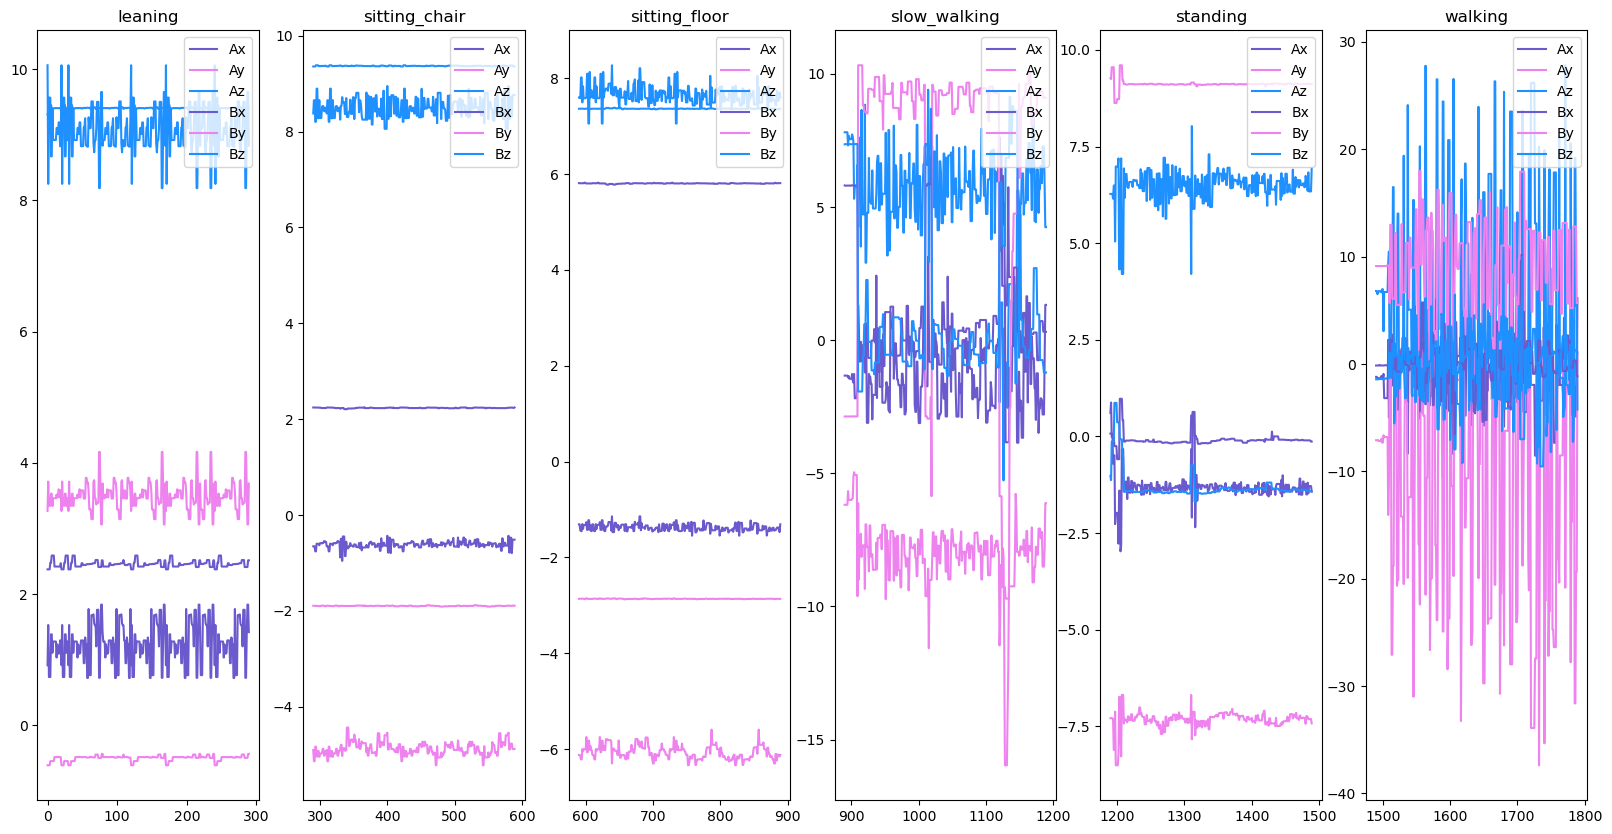

In [133]:
#가속도
#%matplotlib qt

%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np

x=[]
Ax=[]
Ay=[]
Az=[]
Bx=[]
By=[]
Bz=[]
for i, action in enumerate(actions):
    x.append(visual_df.loc[visual_df['label']==i]['index'])
    Ax.append(visual_df.loc[visual_df['label']==i]['Ax'])
    Ay.append(visual_df.loc[visual_df['label']==i]['Ay'])
    Az.append(visual_df.loc[visual_df['label']==i]['Az'])
    Bx.append(visual_df.loc[visual_df['label']==i]['Bx'])
    By.append(visual_df.loc[visual_df['label']==i]['By'])
    Bz.append(visual_df.loc[visual_df['label']==i]['Bz'])

fig = plt.figure(figsize=(20, 10))
map=[]
for i, action in enumerate(actions):
    map.append(fig.add_subplot(1, 6, i+1))
    map[i].plot(x[i],Ax[i],'slateblue',label='Ax')
    map[i].plot(x[i],Ay[i],'violet',label='Ay')
    map[i].plot(x[i],Az[i],'dodgerblue',label='Az')
    map[i].plot(x[i],Bx[i],'slateblue',label='Bx')
    map[i].plot(x[i],By[i],'violet',label='By')
    map[i].plot(x[i],Bz[i],'dodgerblue',label='Bz')
    map[i].legend(loc='upper right')

    plt.title(action)
plt.show()

# train, test set

In [141]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 10, 6)
(9, 10, 6)
(170, 6)
(9, 6)


In [143]:
y_train[0]

array([0, 0, 0, 1, 0, 0])

In [144]:
X_train[0]

array([[-3.09571433, -7.54127979,  4.74018145,  0.75759888,  9.46273804,
        -0.86143494],
       [-3.09571433, -7.54127979,  4.74018145, -0.27825928,  9.27549744,
         0.3117218 ],
       [-3.09571433, -7.54127979,  4.74018145, -0.27825928,  9.27549744,
         0.3117218 ],
       [-2.64077878, -8.82951546,  6.03798866, -0.27825928,  9.27549744,
         0.3117218 ],
       [-2.64077878, -8.82951546,  6.03798866, -0.31991577,  8.21762085,
         0.62786865],
       [-2.64077878, -8.82951546,  6.03798866, -0.03633118,  9.52497864,
        -0.02178955],
       [-2.64077878, -8.82951546,  6.03798866, -0.03633118,  9.52497864,
        -0.02178955],
       [-1.57058895, -8.07517815,  7.093822  , -0.03633118,  9.52497864,
        -0.02178955],
       [-1.83619225, -7.33310413,  3.78514624, -0.03633118,  9.52497864,
        -0.02178955],
       [-2.46101809, -8.12542725,  7.14646387, -0.03633118,  9.52497864,
        -0.02178955]])

# 모델

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [146]:
model = Sequential() #순차적으로 모델의 레이어를 추가한다.
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10,6)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [147]:

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [148]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
6/6 [==============================] - 3s 53ms/step - loss: 1.7195 - categorical_accuracy: 0.2765
Epoch 2/50
6/6 [==============================] - 0s 28ms/step - loss: 1.3091 - categorical_accuracy: 0.5529
Epoch 3/50
6/6 [==============================] - 0s 32ms/step - loss: 0.9456 - categorical_accuracy: 0.7412
Epoch 4/50
6/6 [==============================] - 0s 31ms/step - loss: 0.7186 - categorical_accuracy: 0.7706
Epoch 5/50
6/6 [==============================] - 0s 30ms/step - loss: 0.4860 - categorical_accuracy: 0.8941
Epoch 6/50
6/6 [==============================] - 0s 28ms/step - loss: 0.3511 - categorical_accuracy: 0.9000
Epoch 7/50
6/6 [==============================] - 0s 31ms/step - loss: 0.4129 - categorical_accuracy: 0.8471
Epoch 8/50
6/6 [==============================] - 0s 44ms/step - loss: 0.2961 - categorical_accuracy: 0.8588
Epoch 9/50
6/6 [==============================] - 0s 18ms/step - loss: 0.2588 - categorical_accuracy: 0.9294
Epoch 10/50
6/6 [==

# 모델 저장

In [149]:
model.save('C:/Users/dlwnr/health care/model/mqtt2/mqtt2.h5')

In [167]:
from keras.models import load_model

model = load_model('C:/Users/dlwnr/health care/model/mqtt2/mqtt2.h5')

# 모델 사용

In [169]:
import os
import numpy as np
#DATA_PATH = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA')  #os.path.join( file name) 파일 이름만 정해주고 경로는 현재 경로이다.

actions = np.array(['leaning','sitting_chair','sitting_floor','slow_walking','standing','walking'])


#no_sequences = 30 #영상 30개 만들어지는데

#sequence_length = 10 #영상 1개의 프레임수는 100개



In [177]:
import paho.mqtt.client as mqtt
import json
import pandas as pd
import numpy as np

# df에 저장하는 예시

columns = ['timestamp', 'Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz', 'Mx', 'My', 'Mz','Latitude', 'Longitude', 'Altitude']
df = pd.DataFrame(columns = columns)

MQTT_TOPIC = [("mobile-ingkle-test-healthcare/sm_sn20_01/data/_all",0),("mobile-ingkle-test-healthcare/sm_q7_01/data/_all",0)]
sen1 = []
sen2 = []

def on_connect(client, userdata, flags, rc):
    # This will be called once the client connects
    print(f"Mqtt Connected!")
    # Subscribe here!
    client.subscribe(MQTT_TOPIC)
    
def on_message(client, userdata, msg):
    global sen1
    global sen2
    
    test = json.loads(msg.payload.decode("utf-8"))
    data = list(test.items())
    
    
    if msg.topic[30:39] ==  'sm_sn20_0':
        sen1.append([data[0][1],data[1][1],data[2][1],data[3][1]])
    else :
        sen2.append([data[1][1],data[2][1],data[3][1]])
        
    sen1 = sen1[-1:]
    sen2 = sen2[-1:]
    
    if len(sen1) == 1  and len(sen2) == 1:
        sen3 = sen1[0]+sen2[0]
        
        
        row = np.array(sen3[1:])
        unixtime = np.array(sen3[0])
        
        p = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy') 
        tp = os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/time.npy') 
        #ap = os.path.join('C:/Users/dlwnr/health care/model/mqtt1/data/mqtt_DATA/all_time.npy')
        
        np.save(p, row)
        np.save(tp, unixtime)
    
        print('row',row) 
        #print('unixtime',unixtime)

    
    
client = mqtt.Client("mqtt-test") # client ID "mqtt-test"
client.on_connect = on_connect
client.on_message = on_message
client.username_pw_set("mobile-ingkle-test-healthcare", "uGWp40k2D2IA")
client.connect("mqtt.dot.ingkle.dev", 31883)
#client.loop_forever()


0

In [179]:
import time

cap = cv2.VideoCapture(0)
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = 5
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('C:/Users/dlwnr/health care/model/mqtt2/test.avi', fourcc, fps, (w, h))

f=0
frame_count = 0
total_fps = 0 
window =[]

while cap.isOpened():
    
    ret,frame = cap.read()
    client.loop()
    
    #보여줘
    #cv2.imshow('me',frame) 
    
    if f%3==0:
        row = np.load(os.path.join('C:/Users/dlwnr/health care/model/mqtt2/data/mqtt_DATA/wait.npy') )
    
        window.append(row)
        window = window[-10:]
       

        #print('-'*70)
        if len(window) == 10:
            res = model.predict(np.expand_dims(window, axis=0))
            
            a = actions[np.argmax(res)]
            
            
            cv2.putText(frame, f'{a}', (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
            cv2.putText(frame, f'{row}', (250,100), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
            cv2.imshow('me',frame)
            out.write(frame)
       

        
        if cv2.waitKey(10)& 0xFF == ord('q'): #q를 누르면 꺼줘
                break
    f = f+1   
out.release()
cap.release()
cv2.destroyAllWindows() 

Mqtt Connected!
row [-0.23210379  0.77796644  9.77258682 -0.21936035 -0.20744324  9.86279297]
row [-0.23210379  0.77796644  9.77258682 -0.23252869 -0.22421265  9.83764648]
row [-0.23210379  0.77796644  9.77258682 -0.2026062  -0.20744324  9.8364563 ]
row [-0.24646074  0.77796644  9.76540852 -0.2026062  -0.20744324  9.8364563 ]
row [-0.24885355  0.78993058  9.76301575 -0.2026062  -0.20744324  9.8364563 ]
row [-0.24885355  0.78993058  9.76301575 -0.20739746 -0.2122345   9.87356567]
row [-0.2656033   0.77318084  9.76301575 -0.20739746 -0.2122345   9.87356567]
row [-0.2656033   0.77318084  9.76301575 -0.2026062  -0.20983887  9.85321045]
row [-0.2656033   0.77318084  9.76301575 -0.20739746 -0.21343994  9.847229  ]
row [-0.24167509  0.79232341  9.76540852 -0.20739746 -0.21343994  9.847229  ]
row [-0.24167509  0.79232341  9.76540852 -0.21217346 -0.22900391  9.85321045]
row [-0.24167509  0.79232341  9.76540852 -0.21577454 -0.2182312   9.8651886 ]
row [-0.24167509  0.79232341  9.76540852 -0.1954